In [ ]:
from joblib import dump
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
news_df = pd.read_csv("/content/drive/MyDrive/Capstone B/WELFake_Dataset.csv")
# Select relevant columns
news_df = news_df[['text', 'label']]

# Drop rows with missing values
news_df_cleaned = news_df.dropna()

# Split the dataset into training and testing sets
y = news_df_cleaned['label']
X_train, X_test, y_train, y_test = train_test_split(
    news_df_cleaned['text'], y, test_size=0.20, random_state=19)

# Create a TF-IDF vectorizer
tfidf_vect = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training and testing data
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Create an SVM model
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

# Example of predicting with the trained SVM model
news = ["The left believes these are all perfectly acceptable topics to discuss with our young children. Whatever you do, just don t mention God!A public hearing is taking place Wednesday morning in the Massachusetts State House to look into a controversial sex survey given to middle school and high school students.Developed by the Centers for Disease Control and called the Youth Risk Behavior Survey, the survey asks students as young as 12 a series of very personal and highly ideological questions.The survey asks students if they are homosexual and if they are transgender. It also asks if they have had oral or anal sex and if they have performed such acts with up to six people.Whether or not they have carried a gun, smoked cigarettes, consumed alcohol and how much also appear on the questionnaire, as well as whether they have taken drugs, such as OxyContin, Percocet, and Vicodin. It asks how often their guardian uses a seat belt, if the youngster has a sexually transmitted disease, and where they sleep.The group MassResistance says the survey is psychologically distorting and will lead the child to think he is abnormal if he is not doing it all. The group stated that having children reveal personal issues about themselves and their family can have emotional consequences. They also complain that the survey results are used by radical groups from Planned Parenthood to LGBT groups to persuade politicians to give more taxpayer money [to] these groups. Though students fill out the survey anonymously, MassResistance warns that they are administered by the teacher in the classroom and there is often pressure for all kids to participate. The test is given nationally and not without controversy. The Chicago Tribune reported two years ago that a Chicago teacher was reprimanded for telling students they had a constitutional right not to fill out the survey.Via: Breitbart News"]

# Transform the new data using the same TF-IDF vectorizer
news_tfidf = tfidf_vect.transform(news)

# Predict using the SVM model
prediction = model.predict(news_tfidf)

print(prediction)


[1]


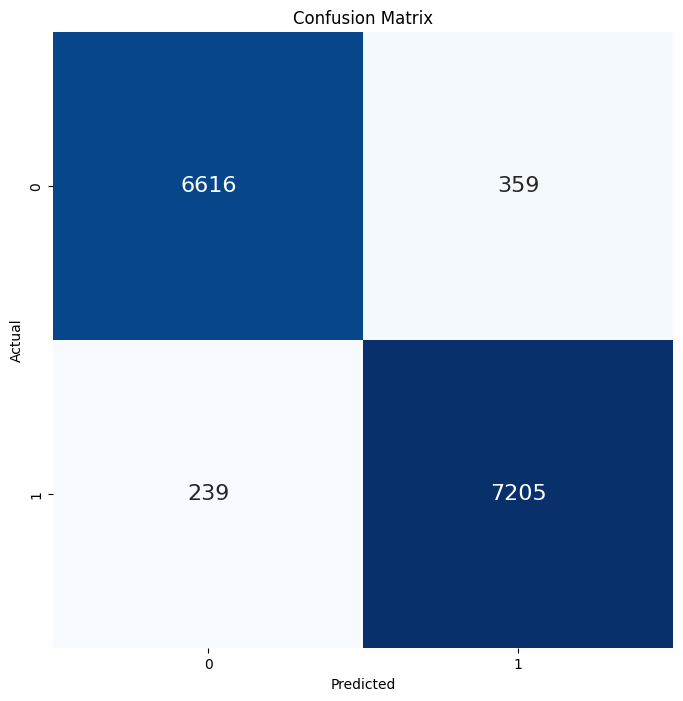

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

Accuracy: 0.9585269436160622
Precision: 0.9586317769484587
Recall: 0.9585269436160622
F1 Score: 0.9585128209210021
